**En esta sección vamos a limpiar los datos que tenemos en nuestros tres datasets**


**En este primer momento vamos a leer lo que sería nuestro dataset 'output_steam_games.json'**

In [4]:
import pandas as pd
import numpy as np


data1= pd.read_json('output_steam_games.json', encoding='utf-8', lines=True)

data1.head(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


Con data1.info() vamos a ver las cantidades de entradas que tiene el dataset además de ver los Dtypes y la cantidad de nulos.

In [87]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


Con la librería missigno vamos a poder ver la cantidad de nulos que hay en todo el json.

!pip install missingno

<Axes: >

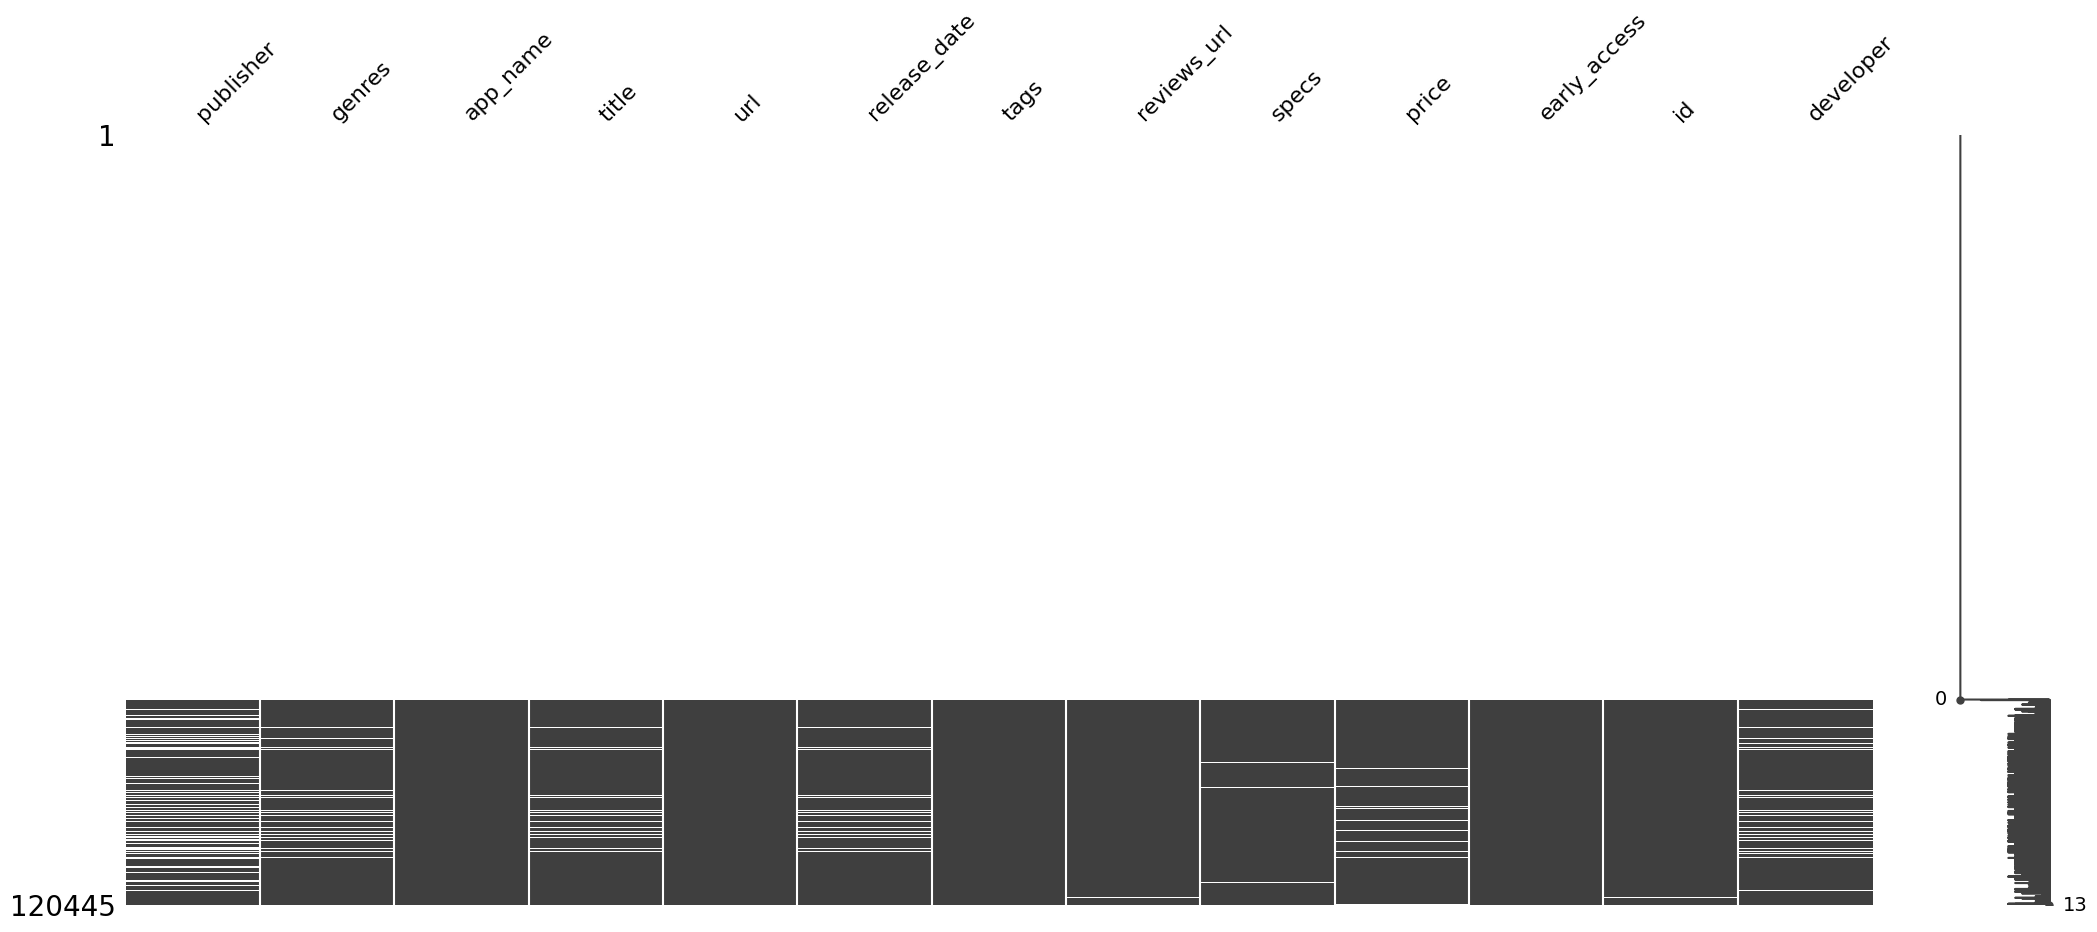

In [10]:
import missingno as msno

%matplotlib inline
msno.matrix(data1)

La idea es eliminar las filas que están totalmentes vacías y trabajar con aquellas que contengan algo de información ya que si dejo totalmente todos los datos no creo que sea de toda utilidad imputarlos ya que hay una gran mayoría de Nulos.

In [88]:
data1.dropna(how='all',inplace=True)

Ahora vamos a ver que mediante data1.info() vamos a ver que se redujo una cantidad totalemente considerable el json debido a la eliminación de todos las filas que tenían Nan

In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.4+ MB


In [90]:
data1['id']=data1['id'].astype(str)

Ahora vamos a proceder a ver nuevamente mediante Missigno la gran limpieza de datos

<Axes: >

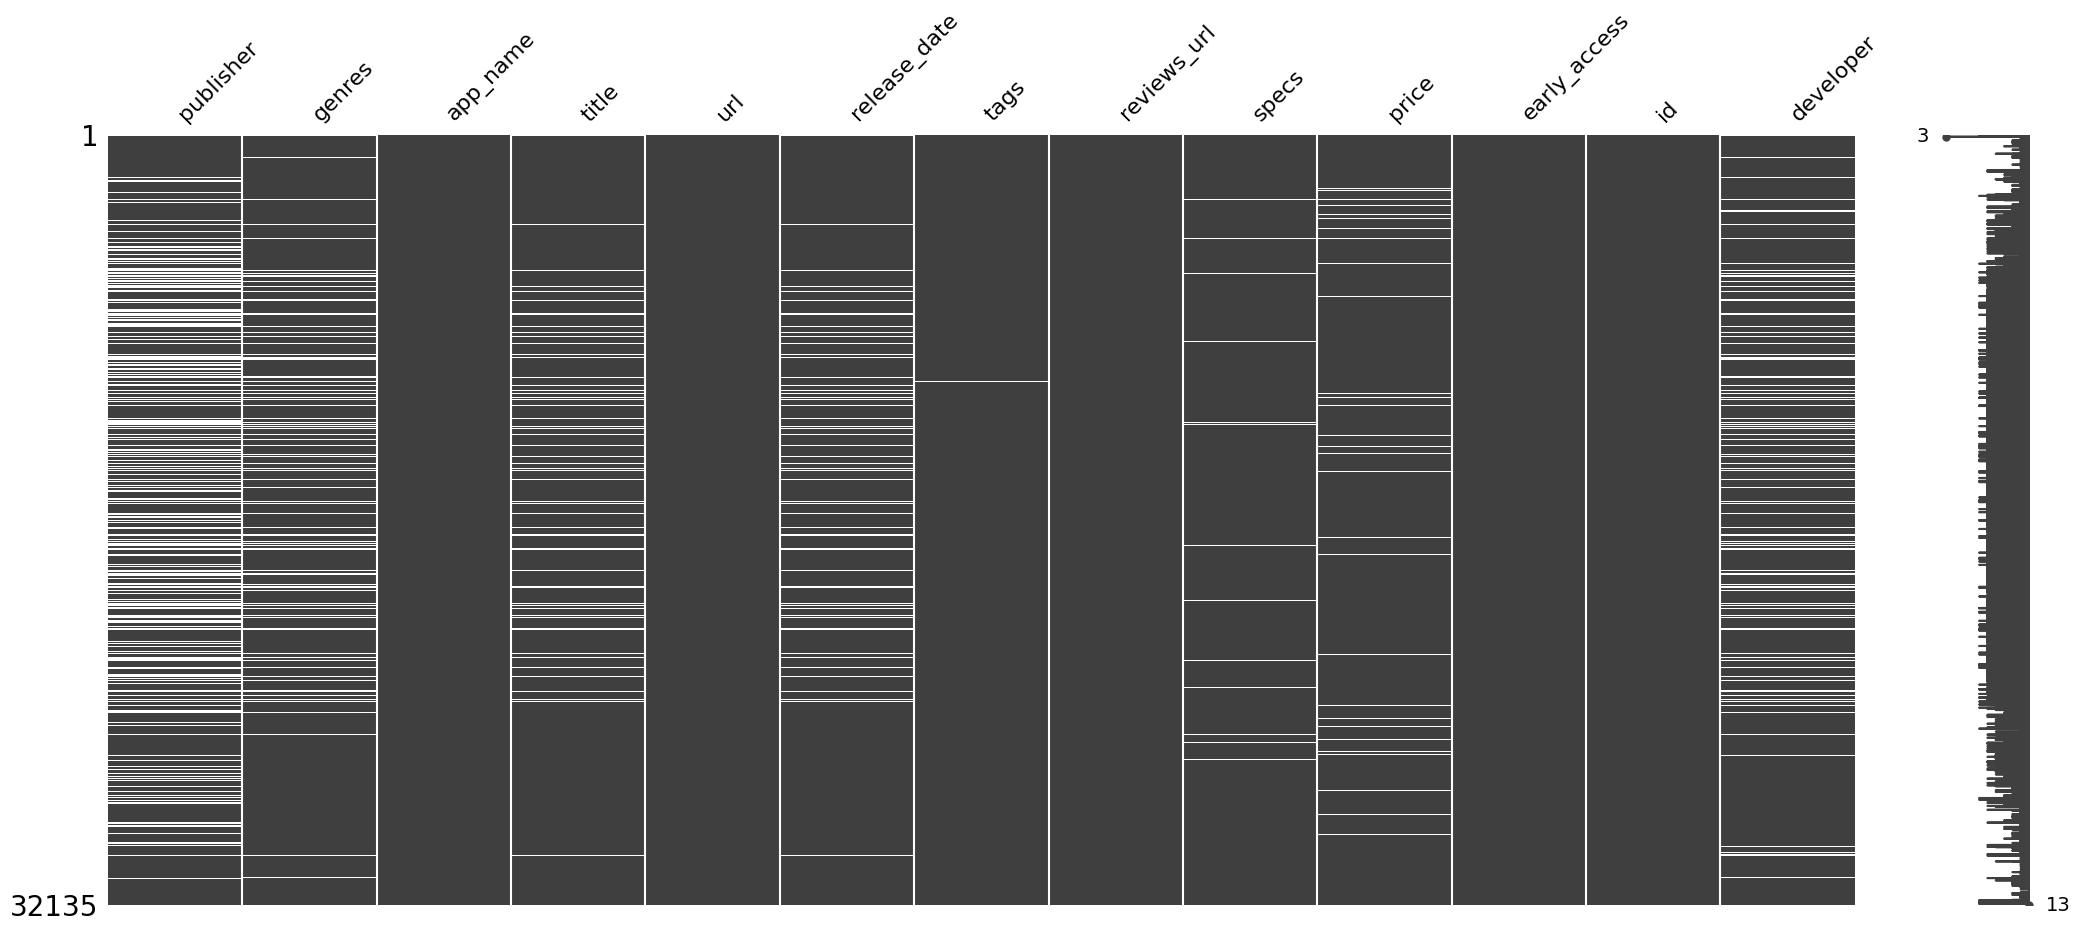

In [16]:
%matplotlib inline
msno.matrix(data1)

Ahora vamos a imputar para tener algo con que trabajar ya que por lo menos tenemos datos con que trabajar a comparación de la primera imagen que podríamos ver

In [91]:
from sklearn.impute import SimpleImputer


# Identificar columnas numéricas y categóricas
columnas_numericas = data1.select_dtypes(include=['float64']).columns
columnas_object = data1.select_dtypes(include=['object']).columns

# Limpiar celdas que contienen listas en columnas categóricas
#Esto lo hice porque a la hora de realizarlo me daba errores de que devolvían listas.
for col in columnas_object:
    if data1[col].apply(lambda x: isinstance(x, list)).any():
        print(f"La columna {col} contiene listas. Limpiando...")
        data1[col] = data1[col].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Limpiar valores 'None' en columnas categóricas
data1[columnas_object] = data1[columnas_object].fillna('')

# Limpiar celdas que contienen listas en columnas numéricas
#Esto lo hice porque a la hora de realizarlo me daba errores de que devolvían listas.
for col in columnas_numericas:
    if data1[col].apply(lambda x: isinstance(x, list)).any():
        print(f"La columna {col} contiene listas. Limpiando...")
        data1[col] = data1[col].apply(lambda x: sum(x) if isinstance(x, list) else x)

# Verificar que las columnas están limpias
print("Después de limpiar:")
print("Columnas categóricas:", data1[columnas_object].head())
print("Columnas numéricas:", data1[columnas_numericas].head())

# Imputador para columnas numéricas (usaremos la media como ejemplo)
imputador_numerico = SimpleImputer(strategy='mean')

# Imputador para columnas categóricas (usaremos la moda como ejemplo)
imputador_categorico = SimpleImputer(strategy='most_frequent')

# Aplicar imputación a las columnas numéricas
data1[columnas_numericas] = imputador_numerico.fit_transform(data1[columnas_numericas])

# Aplicar imputación a las columnas categóricas
data1[columnas_object] = imputador_categorico.fit_transform(data1[columnas_object])

# Verificar resultados
data1.info()


La columna genres contiene listas. Limpiando...
La columna tags contiene listas. Limpiando...
La columna specs contiene listas. Limpiando...
Después de limpiar:
Columnas categóricas:               publisher                                       genres  \
88310         Kotoshiro      Action Casual Indie Simulation Strategy   
88311  Making Fun, Inc.              Free to Play Indie RPG Strategy   
88312      Poolians.com  Casual Free to Play Indie Simulation Sports   
88313              彼岸领域                      Action Adventure Casual   
88314                                                                  

                      app_name                    title  \
88310      Lost Summoner Kitty      Lost Summoner Kitty   
88311                Ironbound                Ironbound   
88312  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
88313                  弹炸人2222                  弹炸人2222   
88314            Log Challenge                            

                             

Una vez que ya está imputado. Lo que vamos a hacer es limpiar todos los datos duplicados que pueden llegar a estar presente en el dataset. De paso vanos a ordenar un poco mejor nuestro dataset.

In [92]:
column_order = ["id", "publisher", "genres", "app_name", "release_date", "price", "early_access", "developer"]
df_juegos = data1[column_order]

In [93]:
duplicados = (lambda df,columna: df[df.duplicated(subset=columna,keep=False)])(df_juegos,'id')

print('filas con duplicados')
duplicados

filas con duplicados


,id,publisher,genres,app_name,release_date,price,early_access,developer
88384,nan,,,,,19.99,0.0,
102204,612880.0,Bethesda Softworks,Action,Wolfenstein II: The New Colossus,2017-10-26,59.99,0.0,Machine Games
102883,612880.0,Bethesda Softworks,Action,Wolfenstein II: The New Colossus,2017-10-26,59.99,0.0,Machine Games
119271,nan,"Warner Bros. Interactive Entertainment, Feral ...",Action Adventure,Batman: Arkham City - Game of the Year Edition,2012-09-07,19.99,0.0,"Rocksteady Studios,Feral Interactive (Mac)"


Ahora que ya están a la vista los duplicados vamos a proceder a eliminarlos

In [94]:
df_juegos=df_juegos.drop([88384,102883])

Para una última corroboración vamos a demostrar que ya no existen más los nulos

In [96]:
duplicados = (lambda df,columna: df[df.duplicated(subset=columna,keep=False)])(df_juegos,'id')

print('filas con duplicados')
duplicados

filas con duplicados


,id,publisher,genres,app_name,release_date,price,early_access,developer


Ahora vamos a tratar con una columna que es complicada que es 'release_date' ya que no tiene formato de datetime y hay que transformalos para extraer su año de lanzamiento

In [97]:
#A partir de la columna 'release_date' lo estamos parseando con pd.to_datetime
df_juegos['anio_lanzamiento']=pd.to_datetime(df_juegos['release_date'],errors='coerce',format='%Y-%m-%d')



Ahora como una miniprueba vamos a ver la columna de anio_lanzamiento

In [98]:
df_juegos['anio_lanzamiento']

88310    2018-01-04
88311    2018-01-04
88312    2017-07-24
88313    2017-12-07
88314           NaT
            ...    
120440   2018-01-04
120441   2018-01-04
120442   2018-01-04
120443   2017-09-02
120444          NaT
Name: anio_lanzamiento, Length: 32133, dtype: datetime64[ns]

Como podemos observar, hay datos que no se transformaron de la manera correcta (sumado a que todavía no hemos extraido del todo el año)

In [99]:
#Obtenemos las fechas que no se pueden convertir por el momento
fechas_no_convertidas=df_juegos[df_juegos['anio_lanzamiento'].isna()]['release_date'].unique()

#Mostramos los que no están convertidos aún
print("Fechas no convertidas")
print(fechas_no_convertidas)


Fechas no convertidas
['' 'Soon..' '2017' 'Beta测试已开启' 'Jun 2009' 'Oct 2010' 'Feb 2011'
 'Aug 2014' 'Sep 2014' 'Apr 2015' 'Apr 2016' 'Jul 2016' 'June 2016'
 'Coming Soon' 'Q2 2017' 'TBA' "When it's done" 'coming soon' 'Q2 2018'
 '2018' 'Winter 2017' 'soon' 'Mar 2018' '14 July' 'Jul 2017' 'Summer 2017'
 'Spring 2018' 'Winter 2018' 'To be Announced' 'October 2017' 'TBD'
 'Fall 2017' 'Nov 2017' 'Q1 2018' 'Dec 2017' 'Январь 2018' 'Soon'
 'First quarter of 2018' 'H2 2018' '21 Jun, 2017' '2018年初頭発売予定'
 'Please wait warmly' 'early access' 'SOON' 'Feb 2018'
 'Coming Soon/Próximamente' 'August 2017' '2018 [Now get free Pre Alpha]'
 '1st Quarter 2018' 'Jan 2018' '预热群52756441' '2018年1月' 'Coming soon'
 'Fall 2018'
 '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵'
 '"""Soon"""' 'Spring 2017' 'Demo coming soon.' 'Coming 2017'
 'Not yet available' "C'est bientôt...                    (ou pas)"
 'January 2019' 'Q4 2017' 'Early 2018'
 'Datachunks conflicted. B

Como se puede observar todavía hay valores que no están convertidos. Vamos a crear una especie de función Regex para convertir esas fechas

In [100]:
#Esta va a ser nuestra función "Regex"
import re
def formato(data):
    formula=re.search(r'\b(?:19|20)\d{2}\b', str(data))
    if(formula):
        anio=formula.group()
        return f"{anio}-01-01"
    else:
        return None
    
    
#Es hora de ver si se aplica correctamente la función

df_juegos['anio_lanzamiento']=df_juegos['release_date'].apply(formato)    

Ahora vamos a ver los valores unicos de la columna

In [101]:
fechas_unicas=df_juegos['anio_lanzamiento'].unique()
print(fechas_unicas)

['2018-01-01' '2017-01-01' None '1997-01-01' '1998-01-01' '2016-01-01'
 '2006-01-01' '2005-01-01' '2003-01-01' '2007-01-01' '2002-01-01'
 '2000-01-01' '1995-01-01' '1996-01-01' '1994-01-01' '2001-01-01'
 '1993-01-01' '2004-01-01' '1999-01-01' '2008-01-01' '2009-01-01'
 '1992-01-01' '1989-01-01' '2010-01-01' '2011-01-01' '2013-01-01'
 '2012-01-01' '2014-01-01' '1983-01-01' '1984-01-01' '2015-01-01'
 '1990-01-01' '1988-01-01' '1991-01-01' '1985-01-01' '1982-01-01'
 '1987-01-01' '1981-01-01' '1986-01-01' '2021-01-01' '2019-01-01'
 '1975-01-01' '1970-01-01' '1980-01-01']


Una vez hecho lo anterior podemos convertir lo que no tiene formato de fecha a valores perdidos y extraer el año para crear "annio lanzamiento". Eliminamos después la columna "release_date" ya que no nos va a ser útil después.

In [102]:
#Vamos a reparsear nuestra columna como hicimos anteriormente
df_juegos['anio_lanzamiento']=pd.to_datetime(df_juegos['anio_lanzamiento'],errors='coerce')

#Ahora vamos a crear la columna anio con los años extraidos solamente
df_juegos['anio']= df_juegos['anio_lanzamiento'].dt.year

#Ahora vamos a eliminar la columna 'release_date' y 'anio_lanzamiento' 
#ya que no nos sirven más
df_juegos=df_juegos.drop(['release_date','anio_lanzamiento'],axis=1)
df_juegos

,id,publisher,genres,app_name,price,early_access,developer,anio
88310,761140.0,Kotoshiro,Action Casual Indie Simulation Strategy,Lost Summoner Kitty,4.99,0.0,Kotoshiro,2018.0
88311,643980.0,"Making Fun, Inc.",Free to Play Indie RPG Strategy,Ironbound,Free To Play,0.0,Secret Level SRL,2018.0
88312,670290.0,Poolians.com,Casual Free to Play Indie Simulation Sports,Real Pool 3D - Poolians,Free to Play,0.0,Poolians.com,2017.0
88313,767400.0,彼岸领域,Action Adventure Casual,弹炸人2222,0.99,0.0,彼岸领域,2017.0
88314,773570.0,,,Log Challenge,2.99,0.0,,NaN
...,...,...,...,...,...,...,...,...
120440,773640.0,Ghost_RUS Games,Casual Indie Simulation Strategy,Colony On Mars,1.99,0.0,"Nikita ""Ghost_RUS""",2018.0
120441,733530.0,Sacada,Casual Indie Strategy,LOGistICAL: South Africa,4.99,0.0,Sacada,2018.0
120442,610660.0,Laush Studio,Indie Racing Simulation,Russian Roads,1.99,0.0,Laush Dmitriy Sergeevich,2018.0
120443,658870.0,SIXNAILS,Casual Indie,EXIT 2 - Directions,4.99,0.0,"xropi,stev3ns",2017.0


Ahora vamos a parsear de float a int los años

In [103]:
df_juegos['anio']= pd.to_numeric(df_juegos['anio'],errors='coerce').astype('Int64')

df_juegos['anio']


88310     2018
88311     2018
88312     2017
88313     2017
88314     <NA>
          ... 
120440    2018
120441    2018
120442    2018
120443    2017
120444    <NA>
Name: anio, Length: 32133, dtype: Int64

Ahora vamos a ver la columna price para ver que podemos tratar

In [104]:
df_juegos['price'].unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99,
       18.99, 29.99, '', 'Free', 10.99, 1.5899999999999999, 14.99, 1.99,
       59.99, 8.99, 6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49,
       15.99, 1.25, 24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.3900000000000001, 'Free HITMAN™ Holiday Pack', 36.99,
       4.49, 2.0, 4.0, 9.0, 234.99, 1.9500000000000002, 1.5, 199.0, 189.0,
       6.66, 27.99, 10.49, 129.99, 179.0, 26.99, 399.99, 31.99, 399.0,
       20.0, 40.0, 3.33, 199.99, 22.99, 320.0, 38.85, 71.7, 59.95, 995.0,
       27.49, 3

Podemos ver desde precios normales hasta valores como "Free To play","Play Demo","Free to Use",etc. Lo que vamos a hacer es normalizarlo y poner en 0 a esos valores

In [105]:
#Convertimos los valores que podemos identificar como precio de partida
df_juegos["price"] = df_juegos["price"].replace("Starting at $499.00", 499.00)

#Ahora vamos a convertir la columna en una columna numerica
df_juegos['price'] = pd.to_numeric(df_juegos['price'],errors='coerce').fillna(0)

df_juegos['price']

88310     4.99
88311     0.00
88312     0.00
88313     0.99
88314     2.99
          ... 
120440    1.99
120441    4.99
120442    1.99
120443    4.99
120444    4.99
Name: price, Length: 32133, dtype: float64

Ahora vamos a ver la columna developer que es más que nada hacer una función regex

In [106]:
df_juegos['developer'].unique()

array(['Kotoshiro', 'Secret Level SRL', 'Poolians.com', ...,
       'Oscar Ortigueira López,OrtiGames/OrtiSoft', 'INGAME',
       'Bidoniera Games'], dtype=object)

In [107]:
df_juegos["developer"] = df_juegos["developer"].apply(lambda name: re.sub(r"\s+", " ", re.sub(r"[^a-zA-Z\s]", "", name.lower().strip())) if isinstance(name, str) else name)

Necesitamos desanidar la columna genres porque hay una lista dentro de esa columna

El método explode() de pandas se utiliza para transformar una columna de listas en varias filas, duplicando las otras columnas de forma que cada elemento de la lista ocupe una fila distinta. Este método es particularmente útil cuando tienes columnas con listas y deseas "aplanar" esos datos para facilitar su análisis.

In [108]:
# "desempaquetamos" la columna
df_juegos = df_juegos.explode("genres")

#tratamos sus respectivos valores perdidos
df_juegos = df_juegos.dropna(subset=["genres"])

## visualizamos cómo quedó la columna
df_juegos

,id,publisher,genres,app_name,price,early_access,developer,anio
88310,761140.0,Kotoshiro,Action Casual Indie Simulation Strategy,Lost Summoner Kitty,4.99,0.0,kotoshiro,2018
88311,643980.0,"Making Fun, Inc.",Free to Play Indie RPG Strategy,Ironbound,0.00,0.0,secret level srl,2018
88312,670290.0,Poolians.com,Casual Free to Play Indie Simulation Sports,Real Pool 3D - Poolians,0.00,0.0,poolianscom,2017
88313,767400.0,彼岸领域,Action Adventure Casual,弹炸人2222,0.99,0.0,,2017
88314,773570.0,,,Log Challenge,2.99,0.0,,<NA>
...,...,...,...,...,...,...,...,...
120440,773640.0,Ghost_RUS Games,Casual Indie Simulation Strategy,Colony On Mars,1.99,0.0,nikita ghostrus,2018
120441,733530.0,Sacada,Casual Indie Strategy,LOGistICAL: South Africa,4.99,0.0,sacada,2018
120442,610660.0,Laush Studio,Indie Racing Simulation,Russian Roads,1.99,0.0,laush dmitriy sergeevich,2018
120443,658870.0,SIXNAILS,Casual Indie,EXIT 2 - Directions,4.99,0.0,xropistevns,2017


Ajustes finales sobre los formatos Nan


In [109]:
# Lista de columnas a procesar
columnas_a_procesar = ['id', 'publisher', 'genres', 'app_name', 'developer', 'anio']
# Convertir "annio_lanzamiento" a string
df_juegos['anio'] = df_juegos['anio'].astype(str)

# Reemplazar NaN, <NA>, y None con "Sin dato" en las columnas especificadas
reemplazos = {
    np.nan: 'Sin dato',
    pd.NA: 'Sin dato',
    None: 'Sin dato',
}
df_juegos[columnas_a_procesar] = df_juegos[columnas_a_procesar].replace(reemplazos)

# Calcular el porcentaje de valores nulos
porcentaje_nulos = df_juegos.isna().mean() * 100
print(porcentaje_nulos)

id              0.0
publisher       0.0
genres          0.0
app_name        0.0
price           0.0
early_access    0.0
developer       0.0
anio            0.0
dtype: float64


In [110]:
# Establecemos las presentaciones posibles de valores nulos como cadenas
representaciones_nulos = ["<NA>", "None", "NA", "<na>", "none", "na", "N/A", "n.a.", "n.a", "N/A/", "missing", "null", ""]

# creamos una máscara que identifique las filas con alguna representación de valor nulo que pusimos arriba
mask_nulos = df_juegos.apply(lambda col: col.astype(str).isin(representaciones_nulos)).any(axis=1)

# Filtrar y mostrar las filas que contienen alguna representación de valor nulo
filas_nulos_cadena = df_juegos[mask_nulos]
filas_nulos_cadena

,id,publisher,genres,app_name,price,early_access,developer,anio
88313,767400.0,彼岸领域,Action Adventure Casual,弹炸人2222,0.99,0.0,,2017
88314,773570.0,,,Log Challenge,2.99,0.0,,<NA>
88316,774276.0,,Free to Play Indie Simulation Sports,SNOW - All Access Basic Pass,9.99,0.0,poppermost productions,2018
88320,768570.0,Qucheza,Action Indie Simulation Early Access,Uncanny Islands,0.00,1.0,qucheza,<NA>
88321,724910.0,,,Icarus Six Sixty Six,0.00,0.0,,<NA>
...,...,...,...,...,...,...,...,...
120428,775640.0,,,Robotpencil Presents: Exercise: Brushwork,3.99,0.0,,2018
120429,777930.0,,,Robotpencil Presents: Creative Composition,3.99,0.0,,2018
120430,775370.0,,,The Gamble House,4.99,0.0,,2016
120431,777950.0,,,Kalen Chock Presents: 2017 Free Tutorial,0.00,0.0,,2018


In [111]:
# Representaciones posibles de valores nulos como cadenas, tambien de valores vacios. 
# Esto ultimo porque estandarizamos developer después de cambiar a "Sin dato"
representaciones_nulos = ["<NA>", "None", "NA", "<na>", "none", "na", "N/A", "n.a.", "n.a", "N/A/", "missing", "null", "sin dato", ""]

# Crear una máscara que identifique las filas con alguna representación de valor nulo
mask_nulos = df_juegos.apply(lambda col: col.astype(str).isin(representaciones_nulos)).any(axis=1)

# Filtrar y mostrar las filas que contienen alguna representación de valor nulo
filas_nulos_cadena = df_juegos[mask_nulos]
filas_nulos_cadena

,id,publisher,genres,app_name,price,early_access,developer,anio
88313,767400.0,彼岸领域,Action Adventure Casual,弹炸人2222,0.99,0.0,,2017
88314,773570.0,,,Log Challenge,2.99,0.0,,<NA>
88316,774276.0,,Free to Play Indie Simulation Sports,SNOW - All Access Basic Pass,9.99,0.0,poppermost productions,2018
88320,768570.0,Qucheza,Action Indie Simulation Early Access,Uncanny Islands,0.00,1.0,qucheza,<NA>
88321,724910.0,,,Icarus Six Sixty Six,0.00,0.0,,<NA>
...,...,...,...,...,...,...,...,...
120428,775640.0,,,Robotpencil Presents: Exercise: Brushwork,3.99,0.0,,2018
120429,777930.0,,,Robotpencil Presents: Creative Composition,3.99,0.0,,2018
120430,775370.0,,,The Gamble House,4.99,0.0,,2016
120431,777950.0,,,Kalen Chock Presents: 2017 Free Tutorial,0.00,0.0,,2018


In [112]:
representaciones_nulos = ["<NA>", "None", "NA", "<na>", "none", "na", "N/A", "n.a.", "n.a", "N/A/", "missing", "null", "sin dato", ""]

# Reemplazar todas las representaciones de valores nulos por "Sin dato"
df_juegos.replace(representaciones_nulos, "Sin dato", inplace=True)

In [113]:
# Representaciones posibles de valores nulos como cadenas, tambien de valores vacios. 
# Esto ultimo porque estandarizamos developer después de cambiar a "Sin dato"
representaciones_nulos = ["<NA>", "None", "NA", "<na>", "none", "na", "N/A", "n.a.", "n.a", "N/A/", "missing", "null", "sin dato", ""]

# Crear una máscara que identifique las filas con alguna representación de valor nulo
mask_nulos = df_juegos.apply(lambda col: col.astype(str).isin(representaciones_nulos)).any(axis=1)

# Filtrar y mostrar las filas que contienen alguna representación de valor nulo
filas_nulos_cadena = df_juegos[mask_nulos]
filas_nulos_cadena

,id,publisher,genres,app_name,price,early_access,developer,anio


Tuve que instalar pyarrow porque me tiraba error a la hora de querer exportarlo a parquet

In [60]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [114]:
df_juegos.to_parquet('steam_games_listo.parquet', engine='pyarrow')

Vamos a abrirlo para corrobar que no hay problemas

In [115]:
steam_parquet= pd.read_parquet('steam_games_listo.parquet')

Por suerte salio todo correcto

In [116]:
steam_parquet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32133 non-null  object 
 1   publisher     32133 non-null  object 
 2   genres        32133 non-null  object 
 3   app_name      32133 non-null  object 
 4   price         32133 non-null  float64
 5   early_access  32133 non-null  float64
 6   developer     32133 non-null  object 
 7   anio          32133 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


**Lectura de nuestro dataset australian_user_reviews**

En esta parte vamos a leer nuestro dataset de australian_user_reviews.json

In [23]:
def descomprimir(archivos_gz,carpeta_destino):
    for archivos_gz in archivos_gz:
        with gzip.open(archivos_gz,'rb') as f_in:
            contenido=f_in.read()
            archivo_destino= os.path.join(carpeta_destino,os.path.splitext(os.path.basename(archivos_gz))[0])
            with open(archivo_destino,'wb') as f_out:
                f_out.write(contenido)
            print(f'Archivo descomprimido {archivo_destino}')
            


archivo_gz_a_descomprimir= ['C:/Users/User/OneDrive/Escritorio/Proyecto Final Individual/PI MLOps - STEAM/user_reviews.json.gz'] 

carpeta_destino= 'C:/Users/User/OneDrive/Escritorio/Proyecto Final Individual/PI MLOps - STEAM'
              

Arreglar en un futuro la dirección en open porque Render no tiene esa función.


Al final decidí que voy a subir esto a github y luego voy a crear otro proyecto para usarlo en Render

In [24]:
import ast

rows = []
#Abrir el archivo "user_reviews.json/australian_user_reviews.json" con la codificación MacRoman.
with open('./australian_user_reviews.json', encoding='utf-8') as f:
    # Leer cada línea del archivo.
    for line in f.readlines():
        # Utilizar "ast.literal_eval" para convertir cada línea en un diccionario de Python
        # y agregarlo a la lista "rows".
        rows.append(ast.literal_eval(line))

#Crear un DataFrame de Pandas a partir de la lista de diccionarios "rows".
df_user_reviews = pd.DataFrame(rows)
#Veamos unos registros al azar
df_user_reviews.sample(2)

,user_id,user_url,reviews
7308,laygittlefiggernaggot,http://steamcommunity.com/id/laygittlefiggerna...,"[{'funny': '', 'posted': 'Posted April 16, 201..."
18478,muttox,http://steamcommunity.com/id/muttox,"[{'funny': '', 'posted': 'Posted April 7, 2013..."


Vemos mediante missigno que al parecer no hay datos que esten vacios pero eso lo vamos a ir investigando más adelante 

<Axes: >

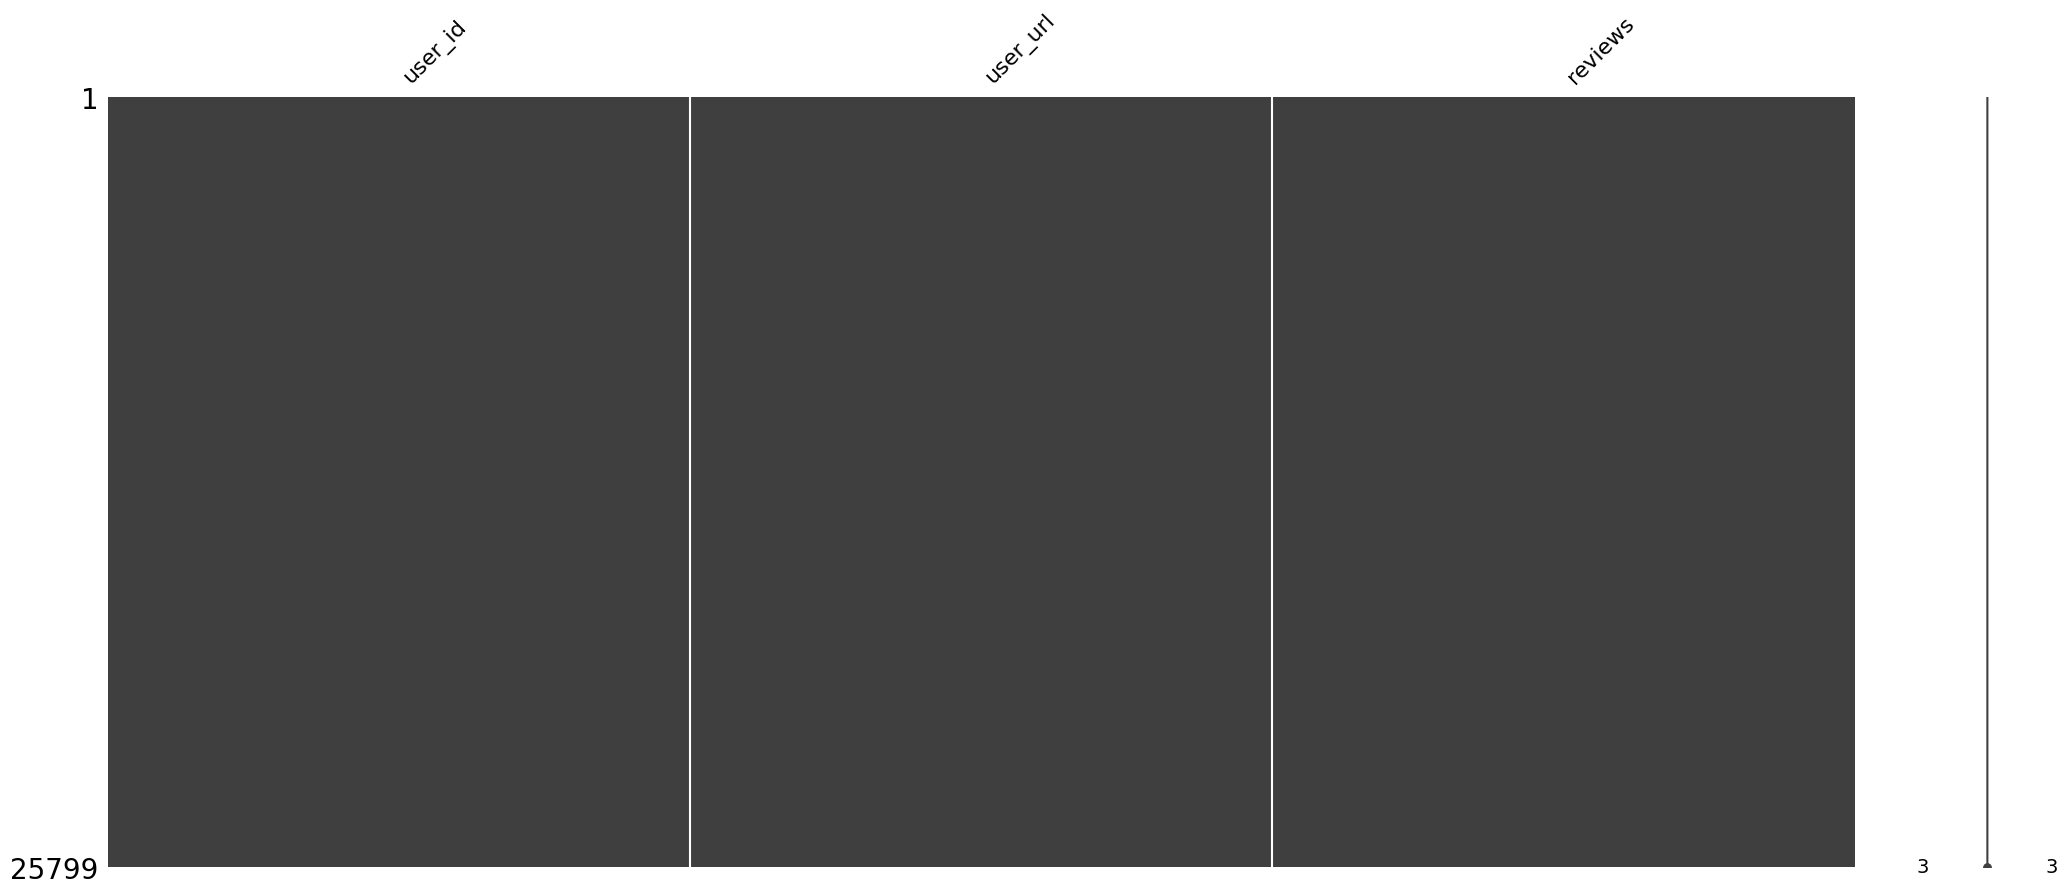

In [25]:
import missingno as msno

%matplotlib inline
msno.matrix(df_user_reviews)

Voy a comprobar ahora cuantos duplicados existen


In [26]:
duplicados = (lambda df, columna: df[df.duplicated(subset=columna, keep=False)])(df_user_reviews, "user_id")
print(duplicados)

                    user_id  \
9         76561198156664158   
50                   Rivtex   
83        76561198094224872   
119    DieMadchenschanderin   
147               relesprit   
...                     ...   
17819     76561198076474887   
17916           yolofaceguy   
18028     76561198075591109   
18234     76561198092022514   
18309        SuchGayMuchWow   

                                                user_url  \
9      http://steamcommunity.com/profiles/76561198156...   
50                   http://steamcommunity.com/id/Rivtex   
83     http://steamcommunity.com/profiles/76561198094...   
119    http://steamcommunity.com/id/DieMadchenschanderin   
147               http://steamcommunity.com/id/relesprit   
...                                                  ...   
17819  http://steamcommunity.com/profiles/76561198076...   
17916           http://steamcommunity.com/id/yolofaceguy   
18028  http://steamcommunity.com/profiles/76561198075...   
18234  http://steamcommunit

Al parecer hay una cantidad exorbitante de datos que son totalemente identicos, lo que vamos a hacer es eliminarlos pero le vamos a dejar que con el id ya que es el único dato "único" que nos puede ayudar

In [27]:
def unico(df, columna_id):
    # Eliminar duplicados manteniendo solo la primera aparición
    df_sin_duplicados = df.drop_duplicates(subset=columna_id,keep='first')

    return df_sin_duplicados

df_user_reviews = unico(df_user_reviews,'user_id')

Una vez que ya saco los repetidos vamos a desanidar la columna review como hicimos con el dataset anterior mediante el método de explode()

In [28]:
desanidado= df_user_reviews.explode('reviews')
df_desanidado= pd.concat([desanidado.drop(['reviews'],axis=1),desanidado['reviews'].apply(pd.Series)],axis=1)
df_desanidado

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


Vamos a hacer una limpieza de columnas del dataframe

In [29]:
#Estas son las columnas que queremos
columnas_a_quedar=['user_id','user_url','funny','posted','last_edited','item_id','helpful','recommend','review']
#Creamos el nuevo dataframe con el df_desanidado anterior mas las nuevas columnas
df_user_reviews=df_desanidado[columnas_a_quedar].copy()

print(df_user_reviews)

                 user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
1                js41637               http://steamcommunity.com/id/js41637   
...                  ...                                                ...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                                  funny            

Una vez que tenemos las columnas que queremos vamos a ver los nulos que contiene el nuevo dataframe y vamos a limpiarlo totalemente

In [31]:
#Vamos a reemplazar los datos vacios de tipo object con ''
df_user_reviews.replace('',None,inplace=True)

In [32]:
#Aqui gacemos una especie de muestra de la cantidad de nulos que hay en cada columna
nulos = df_user_reviews.isna().sum()
print(nulos)

user_id            0
user_url           0
funny          50448
posted            28
last_edited    52421
item_id           28
helpful           28
recommend         28
review            58
dtype: int64


Vamos a proceder a eliminar las columnas funny y last_edited

In [33]:
df_user_reviews = df_user_reviews.drop(['funny','last_edited'],axis=1)

In [34]:
#Hacemos otra verificación para ver nomás
nulos = df_user_reviews.isna().sum()
print(nulos)

user_id       0
user_url      0
posted       28
item_id      28
helpful      28
recommend    28
review       58
dtype: int64


A comparación de las tablas que eliminamos, vamos a tratar de eliminarlas solamente las que tengan todas vacias 

In [35]:
limpieza = ['posted','item_id','helpful','recommend','review']

#Como hicimos con el data anterior (el de juegos_steam), vamos a eliminar todo aquellos que sea Nan completo
df_user_reviews=df_user_reviews.dropna(subset=limpieza,how='all')
print(df_user_reviews)

                 user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
1                js41637               http://steamcommunity.com/id/js41637   
...                  ...                                                ...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                          posted item_id  \
0      

In [36]:
#Hacemos otra verificación para ver nomás
nulos = df_user_reviews.isna().sum()
print(nulos)

user_id       0
user_url      0
posted        0
item_id       0
helpful       0
recommend     0
review       30
dtype: int64


Queda un poquito en lo que es review, así que hacemos la ultima limpieza

In [37]:
df_user_reviews=df_user_reviews.dropna(subset=['review'])

In [38]:
#Hacemos otra verificación para ver nomás
nulos = df_user_reviews.isna().sum()
print(nulos)

user_id      0
user_url     0
posted       0
item_id      0
helpful      0
recommend    0
review       0
dtype: int64


Ya está la limpieza hecha. Ahora a seguir procesando otras columnas (en este caso vamos a tratar la columna posted)

In [40]:
#Hacemos esto porque en la columna Posted estaba la palabra Posted
df_user_reviews['posted'] = df_user_reviews['posted'].str.replace('Posted','')

In [41]:
#Ahora lo tenenmos que convertir en un dato de date_time
df_user_reviews['posted'] = pd.to_datetime(df_user_reviews['posted'],dayfirst=True,errors='coerce')

In [42]:
#Lo que nos interesa ahora es extraer el año
df_user_reviews['anio_lanzado'] = df_user_reviews['posted'].dt.year.astype('object')
#Imputamos valores por las dudas
df_user_reviews['anio_lanzado'].fillna('Sin dato',inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_18056\3037420798.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_user_reviews['anio_lanzado'].fillna('Sin dato',inplace=True)


In [45]:
#Esto es para ver los datos solamente
frecuencia = df_user_reviews['anio_lanzado'].value_counts()
frecuencia

anio_lanzado
2014.0      21821
2015.0      18146
Sin dato     9929
2013.0       6707
2012.0       1201
2011.0        530
2010.0         66
Name: count, dtype: int64

In [47]:
#Como hicimos en el data anterior, lo vamos a poner en Int para evitar futuros problemas
df_user_reviews['anio_lanzado']= pd.to_numeric(df_user_reviews['anio_lanzado'],errors='coerce').astype('Int64')

Ahora una ultima limpieza final

Tira error porque ya lo elimine previamente

In [ ]:
eliminacion = ['helpful','user_url','posted']

df_user_reviews.drop(eliminacion,axis=1,inplace=True)

df_user_reviews

Ahora exportamos a parquet

In [49]:
df_user_reviews.to_parquet('df_user_reviews.parquet', engine='pyarrow')

Importamos para verificar nomás

In [50]:
user_parquet= pd.read_parquet('df_user_reviews.parquet')
print(user_parquet.info())

<class 'pandas.core.frame.DataFrame'>
Index: 58400 entries, 0 to 25798
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       58400 non-null  object
 1   item_id       58400 non-null  object
 2   recommend     58400 non-null  bool  
 3   review        58400 non-null  object
 4   anio_lanzado  48471 non-null  Int64 
dtypes: Int64(1), bool(1), object(3)
memory usage: 2.3+ MB
None


Salio todo bien

**Lectura de User_Items**

In [51]:
def descomprimir(archivos_gz,carpeta_destino):
    for archivos_gz in archivos_gz:
        with gzip.open(archivos_gz,'rb') as f_in:
            contenido=f_in.read()
            archivo_destino= os.path.join(carpeta_destino,os.path.splitext(os.path.basename(archivos_gz))[0])
            with open(archivo_destino,'wb') as f_out:
                f_out.write(contenido)
            print(f'Archivo descomprimido {archivo_destino}')
            


archivo_gz_a_descomprimir= ['C:/Users/User/OneDrive/Escritorio/Proyecto Final Individual/PI MLOps - STEAM/user_items.json.gz'] 

carpeta_destino= 'C:/Users/User/OneDrive/Escritorio/Proyecto Final Individual/PI MLOps - STEAM'

In [52]:
rows = []
#Abrir el archivo "user_reviews.json/australian_user_reviews.json" con la codificación MacRoman.
with open('./australian_users_items.json', encoding='utf-8') as f:
    # Leer cada línea del archivo.
    for line in f.readlines():
        # Utilizar "ast.literal_eval" para convertir cada línea en un diccionario de Python
        # y agregarlo a la lista "rows".
        rows.append(ast.literal_eval(line))

#Crear un DataFrame de Pandas a partir de la lista de diccionarios "rows".
df_user_items = pd.DataFrame(rows)
#Veamos unos registros al azar
df_user_items.sample(2)

,user_id,items_count,steam_id,user_url,items
52782,paojdsflkasjfda,50,76561198046829272,http://steamcommunity.com/id/paojdsflkasjfda,"[{'item_id': '12120', 'item_name': 'Grand Thef..."
30432,kaine123511,194,76561198105283426,http://steamcommunity.com/id/kaine123511,"[{'item_id': '320', 'item_name': 'Half-Life 2:..."


Esta vez solo voy a utilizar info() porque demora bastante en cargar el df ya que si hago missigno puede llegar a tardar demasiado

In [53]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


En un primer momento no parece haber nulos pero eso se va desentramando mientras vamos explorando mejor

Vamos a eliminar las columnas user_id e items_count porque ya la tenemos en anteriores df

In [54]:
df_user_items=df_user_items.drop(['user_url','items_count'],axis=1)
df_user_items

,user_id,steam_id,items
0,76561197970982479,76561197970982479,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,76561198035864385,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,76561198007712555,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,76561197963445855,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,76561198002099482,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...
88305,76561198323066619,76561198323066619,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,76561198326700687,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,76561198328759259,[]
88308,76561198329548331,76561198329548331,"[{'item_id': '304930', 'item_name': 'Unturned'..."


Vamos a desanidar la columna items como lo hicimos las otras veces

desanidado= df_user_items.explode('items')
df_desanidado= pd.concat([desanidado.drop(['items'],axis=1),desanidado['items'].apply(pd.Series)],axis=1)
df_desanidado

Al final voy a desistir de esta manera porque se estaba demorando más de 6 minutos. Vamos a probar de otra manera 

La función json_normalize() de la biblioteca pandas en Python se utiliza para aplanar estructuras JSON anidadas y convertirlas en un DataFrame. Esto es especialmente útil cuando trabajas con datos JSON complejos, donde los campos pueden contener listas o diccionarios anidados.

In [62]:
#Vamos a utilizar json_normalize
#El primer parametro rows es donde se almacena el diccionario
df_json=pd.json_normalize(rows, record_path=["items"], meta=["steam_id","user_id"])
df_user_items=df_json

En mi caso duró tan solo 21 segundos en desanidar todo a diferencia de explode() que me estaba demorando 6 minutos y no había respuesta alguna. Ambos metodo sirven igual; no digo que uno es mejor que otro

In [63]:
df_user_items

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,user_id
0,10,Counter-Strike,6,0,76561197970982479,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479,76561197970982479
...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,76561198329548331
5153205,373330,All Is Dust,0,0,76561198329548331,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,76561198329548331


In [64]:
#Ordenamos 
orden=['user_id','steam_id','item_id','item_name','playtime_forever','playtime_2weeks']

#reordenar
df_user_items=df_user_items[orden]

df_user_items

,user_id,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,76561198329548331,521570,You Have 10 Seconds 2,4,4


Vemos los duplicados

In [65]:
dupli=df_user_items.duplicated().sum()

print(dupli)


59104


Eliminamos los duplicados


In [66]:
df_user_items.drop_duplicates(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18056\3352295025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_items.drop_duplicates(inplace=True)


In [69]:
# verificamos de nuevo,
duplicados = df_user_items.duplicated()
# Contar duplicados
cantidad_duplicados = duplicados.sum()
# Mostrar resultados
print(cantidad_duplicados)


0


Eliminamos la columna de playtime_2weeks si ya tenemos el original que es el tiempo total


In [70]:
df_user_items=df_user_items.drop(columns=['playtime_2weeks'])

df_user_items

,user_id,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,76561197970982479,10,Counter-Strike,6
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,76561197970982479,30,Day of Defeat,7
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,346330,BrainBread 2,0
5153205,76561198329548331,76561198329548331,373330,All Is Dust,0
5153206,76561198329548331,76561198329548331,388490,One Way To Die: Steam Edition,3
5153207,76561198329548331,76561198329548331,521570,You Have 10 Seconds 2,4


Se exporta en parquet como las veces anteriores

In [71]:
df_user_items.to_parquet('df_user_items.parquet', engine='pyarrow')

Se lee por las dudas

In [72]:
df_par= pd.read_parquet('df_user_items.parquet')

df_par

,user_id,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,76561197970982479,10,Counter-Strike,6
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,76561197970982479,30,Day of Defeat,7
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,346330,BrainBread 2,0
5153205,76561198329548331,76561198329548331,373330,All Is Dust,0
5153206,76561198329548331,76561198329548331,388490,One Way To Die: Steam Edition,3
5153207,76561198329548331,76561198329548331,521570,You Have 10 Seconds 2,4


Salio todo bien por suerte